#EECS 442 PS1: Filtering

__Please provide the following information__
(e.g. Andrew Owens, ahowens):

Po-Hsun Chang, 40183452

__Important__:
1. After you copy the .ipynb file, please name it as __your_uniquename_your_umid.ipynb__ before you submit it to Canvas. Example: adam_01101100.ipynb.
2. Please convert your Colab notebook to a PDF file and submit the PDF file to Canvas. You can follow [these](https://docs.google.com/document/d/1U49zxpV736_BIUh_mfCn66D20UYAGsKQbfJPvwuiX1s/edit?usp=sharing) instructions. For your convenience, we have included the PDF conversion script at the end of this notebook.  




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).



# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import urllib.request

# Download the images that you'll need
base_url = 'http://www.eecs.umich.edu/courses/eecs442/fa24/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

/var/folders/6s/5qbkm1h536s83lpt01kkd8yr0000gn/T/ipykernel_81852/3836677840.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('dog-1.jpg')


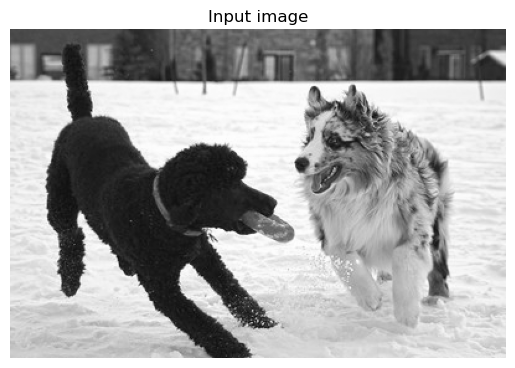

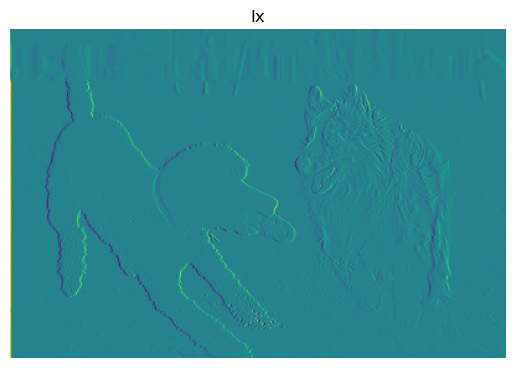

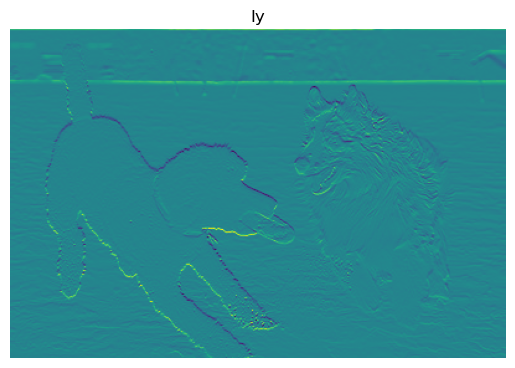

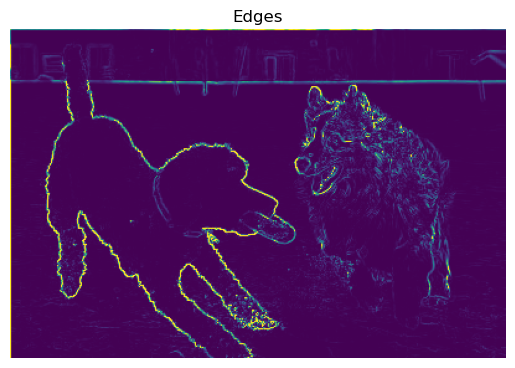

In [2]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

# TODO: Your code here!
def convolve(im, h):
    # Flip the filter for convolution
    h_flipped = np.flipud(np.fliplr(h))
    img_h, img_w = im.shape
    filter_h, filter_w = h.shape
    pad_h = filter_h // 2
    pad_w = filter_w // 2
    # Zero pad the image
    padded = np.pad(im, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    out = np.zeros_like(im)
    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+filter_h, j:j+filter_w]
            out[i, j] = np.sum(region * h_flipped)
    return out

dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
# The `vmin' and `vmax' parameters are set so that 0 is always set to be
# the lowest value and the highest value is set on a per-input basis
# to the 99th percentile value in `edges'.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

/var/folders/6s/5qbkm1h536s83lpt01kkd8yr0000gn/T/ipykernel_81852/1833432354.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('dog-2.jpg').mean(2)/255.


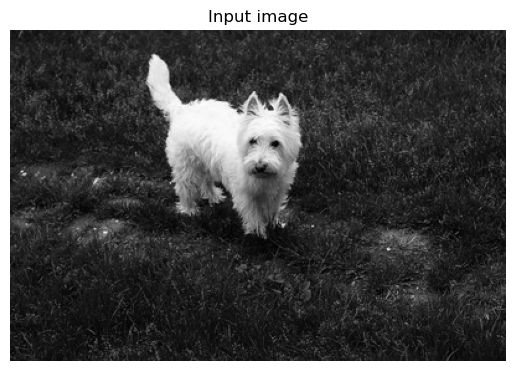

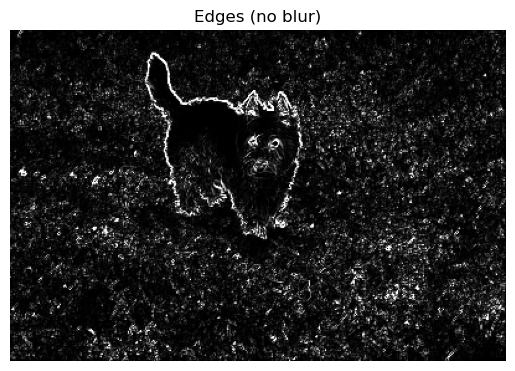

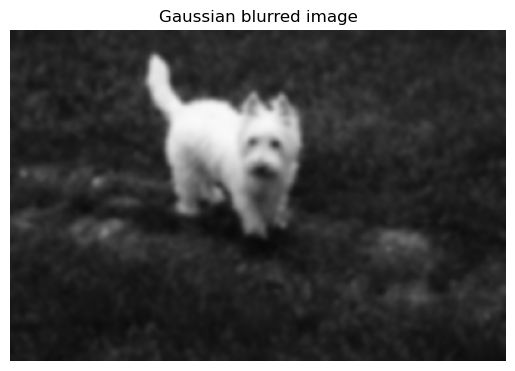

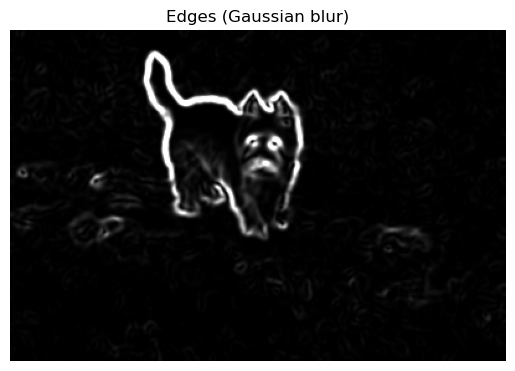

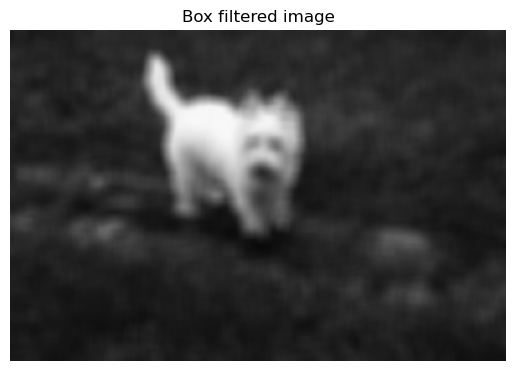

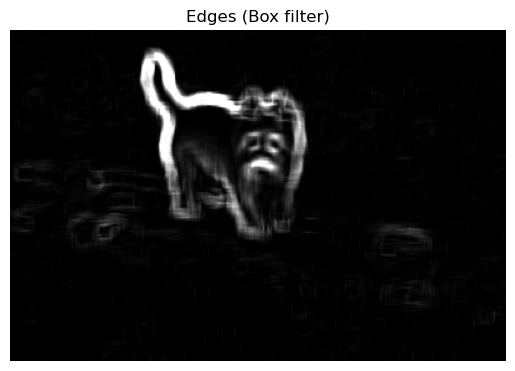

In [12]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

# TODO: Your code here!
# (i) Compute edges without blurring
dx = np.array([[1, -1]])
dy = np.array([[1], [-1]])
Ix = scipy.ndimage.convolve(im, dx)
Iy = scipy.ndimage.convolve(im, dy)
edges_no_blur = Ix**2 + Iy**2

# (ii) Gaussian filter (σ=2, 11x11)
def gaussian_kernel(size, sigma):
    ax = np.arange(-(size // 2), size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

gauss = gaussian_kernel(11, 2)
im_blur = scipy.ndimage.convolve(im, gauss)
Ix_blur = scipy.ndimage.convolve(im_blur, dx)
Iy_blur = scipy.ndimage.convolve(im_blur, dy)
edges_gauss = Ix_blur**2 + Iy_blur**2

# (iii) Box filter (11x11)
box = np.ones((11, 11)) / (11*11)
im_box = scipy.ndimage.convolve(im, box)
Ix_box = scipy.ndimage.convolve(im_box, dx)
Iy_box = scipy.ndimage.convolve(im_box, dy)
edges_box = Ix_box**2 + Iy_box**2

# Visualizations
# (i) Original image
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, vmin=0, vmax=1, cmap='gray')

# (i) Edges without blurring
plt.figure()
plt.title('Edges (no blur)')
plt.axis('off')
plt.imshow(edges_no_blur, vmin=0, vmax=np.percentile(edges_no_blur, 99), cmap='gray')

# (ii) Gaussian blurred image
plt.figure()
plt.title('Gaussian blurred image')
plt.axis('off')
plt.imshow(im_blur, vmin=0, vmax=1, cmap='gray')

# (ii) Edges with Gaussian blur
plt.figure()
plt.title('Edges (Gaussian blur)')
plt.axis('off')
plt.imshow(edges_gauss, vmin=0, vmax=np.percentile(edges_gauss, 99), cmap='gray')

# (iii) Box filtered image
plt.figure()
plt.title('Box filtered image')
plt.axis('off')
plt.imshow(im_box, vmin=0, vmax=1, cmap='gray')

# (iii) Edges with Box filter
plt.figure()
plt.title('Edges (Box filter)')
plt.axis('off')
plt.imshow(edges_box, vmin=0, vmax=np.percentile(edges_box, 99), cmap='gray')

plt.show()

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

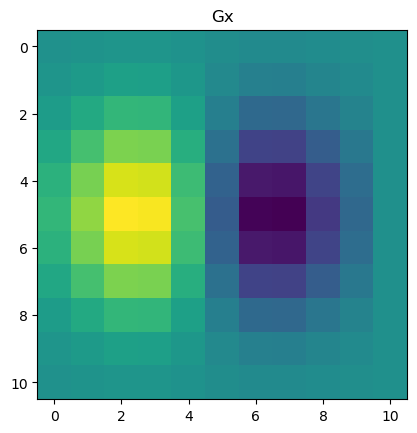

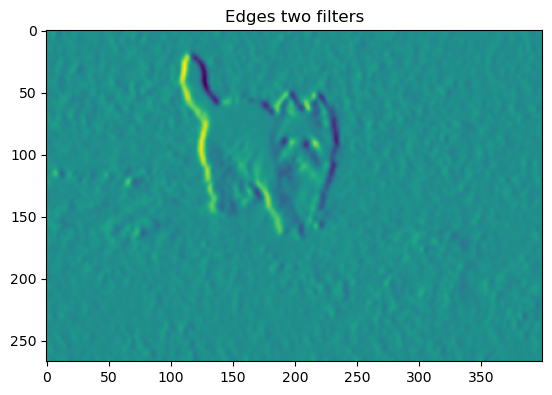

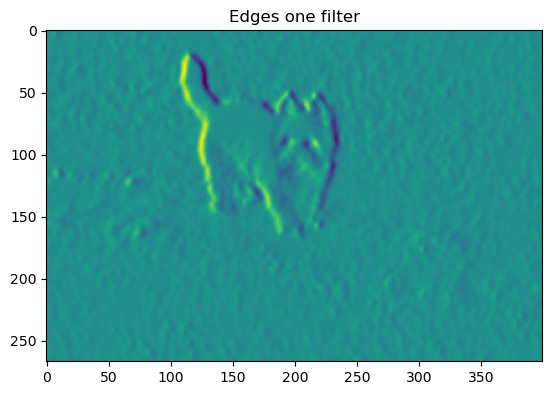

In [4]:
# TODO: Your code here!
gauss = gaussian_kernel(11, 2)
dx = np.array([[1, -1]])

# Gx: Convolve Gaussian with gradient filter
Gx = scipy.ndimage.convolve(gauss, dx)

plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('Edges two filters')
Ix = scipy.ndimage.convolve(im_blur, dx)
plt.imshow(Ix)

plt.figure()
plt.title('Edges one filter')
plt.imshow(scipy.ndimage.convolve(im, Gx))

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

/var/folders/6s/5qbkm1h536s83lpt01kkd8yr0000gn/T/ipykernel_81852/772312801.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('apple.jpg').mean(2)/255.


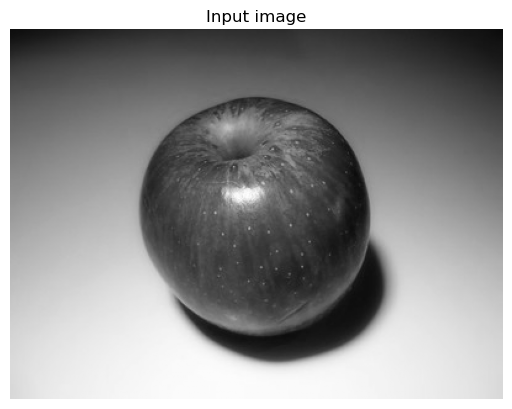

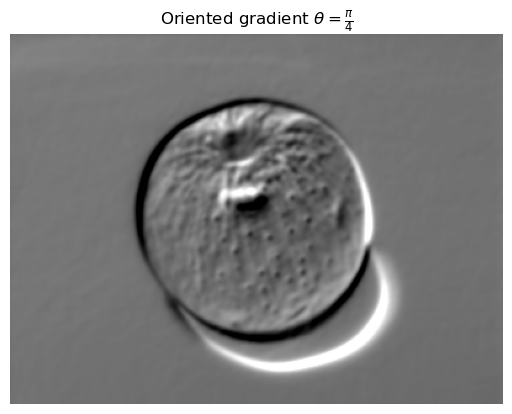

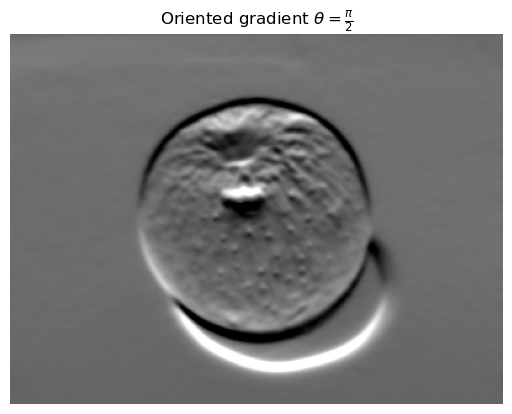

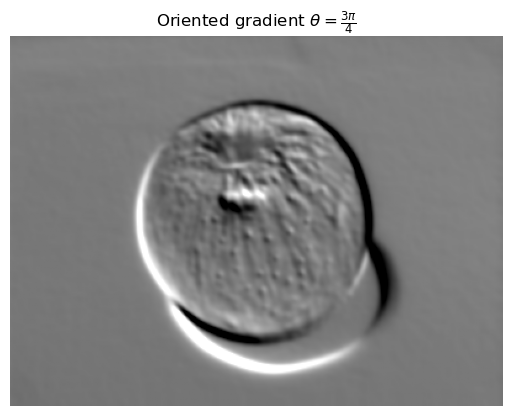

In [10]:
im = imageio.imread('apple.jpg').mean(2)/255.

# TODO: Your code here!
def oriented_grad(Ix, Iy, theta):
    return Ix * np.cos(theta) + Iy * np.sin(theta)

# Blur image with gaussian first
gauss = gaussian_kernel(11, 2)
im_blur = scipy.ndimage.convolve(im, gauss)
Ix = scipy.ndimage.convolve(im_blur, dx)
Iy = scipy.ndimage.convolve(im_blur, dy)

# Specify theta angles
thetas = [np.pi/4, np.pi/2, 3*np.pi/4]

titles = [r'$\theta = \frac{\pi}{4}$', r'$\theta = \frac{\pi}{2}$', r'$\theta = \frac{3\pi}{4}$']

# Plot
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap='gray', vmin=0, vmax=1)

for i, theta in enumerate(thetas):
    g = oriented_grad(Ix, Iy, theta)
    plt.figure()
    plt.title(f'Oriented gradient {titles[i]}')
    plt.axis('off')
    plt.imshow(g, cmap='gray', vmin=np.percentile(g, 1), vmax=np.percentile(g, 99))

plt.show()

# Problem 1.2 Pet edge detection (f)

Please visualize the results using matplotlib.

/var/folders/6s/5qbkm1h536s83lpt01kkd8yr0000gn/T/ipykernel_81852/2337546010.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  noisy_im = imageio.imread('dog-1.jpg').mean(2)/255.


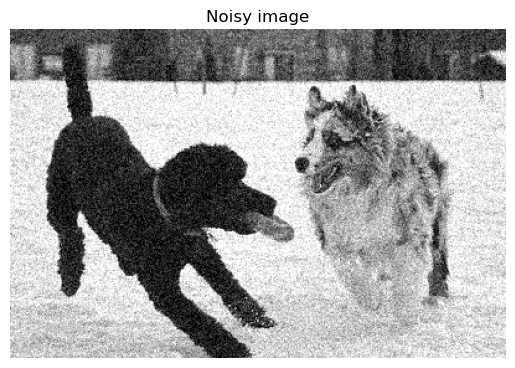

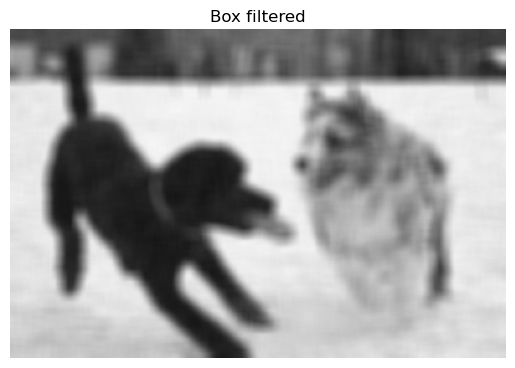

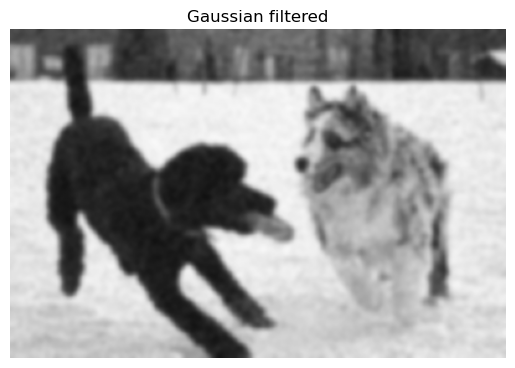

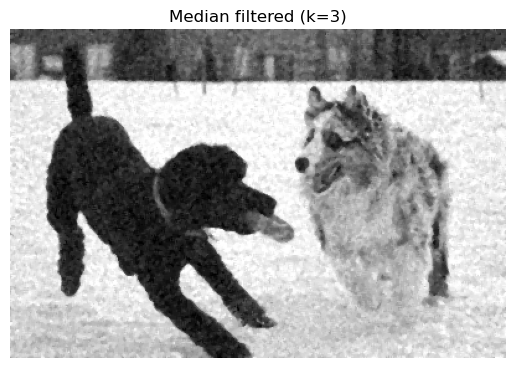

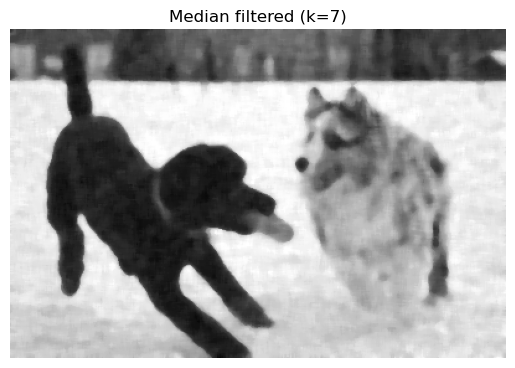

In [ ]:
# Sample a noisy pet image
# (i) Noisy image
noisy_im = imageio.imread('dog-1.jpg').mean(2)/255.
noisy_im = noisy_im + np.random.randn(*noisy_im.shape) * 0.1
noisy_im = np.clip(noisy_im, 0, 1)

# TODO: Your code here!
# (ii) Box filter on noisy image
box = np.ones((11, 11)) / (11*11)
filtered_box = scipy.ndimage.convolve(noisy_im, box)

# (iii) Gaussian filter on noisy image
gauss = gaussian_kernel(11, 2)
filtered_gauss = scipy.ndimage.convolve(noisy_im, gauss)

# Median filter
def median(im, k):
    pad = k // 2
    padded = np.pad(im, ((pad, pad), (pad, pad)), mode='edge')
    out = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            region = padded[i:i+k, j:j+k]
            out[i, j] = np.median(region)
    return out

# (iv) Median filter on noisy image (k = 3)
filtered_med3 = median(noisy_im, 3)
# (v) Median filter on noisy image (k = 7)
filtered_med7 = median(noisy_im, 7)

# Visualizations
# (i) Noisy image
plt.figure()
plt.title('Noisy image')
plt.axis('off')
plt.imshow(noisy_im, cmap='gray', vmin=0, vmax=1)

# (ii) Box filter on noisy image
plt.figure()
plt.title('Box filtered')
plt.axis('off')
plt.imshow(filtered_box, cmap='gray', vmin=0, vmax=1)

# (iii) Gaussian filter on noisy image
plt.figure()
plt.title('Gaussian filtered')
plt.axis('off')
plt.imshow(filtered_gauss, cmap='gray', vmin=0, vmax=1)

# (iv) Median filter on noisy image (k = 3)
plt.figure()
plt.title('Median filtered (k=3)')
plt.axis('off')
plt.imshow(filtered_med3, cmap='gray', vmin=0, vmax=1)

# (v) Median filter on noisy image (k = 7)
plt.figure()
plt.title('Median filtered (k=7)')
plt.axis('off')
plt.imshow(filtered_med7, cmap='gray', vmin=0, vmax=1)

plt.show()

# Convert Notebook to PDF

In [15]:
# generate pdf
# Please provide the full path of the notebook file below
# Important: make sure that your file name does not contain spaces!
import os
notebookpath = '/content/drive/My Drive/EECS 442 - Computer Vision/Hw/hw1/pohsun_40183452.ipynb' # Ex: notebookpath = '/content/drive/My Drive/Colab Notebooks/EECS 442 Fall 2025 - PS1.ipynb'
drive_mount_point = '/content/drive/'
from google.colab import drive
drive.mount(drive_mount_point)
file_name = notebookpath.split('/')[-1]
get_ipython().system("apt update && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended")
get_ipython().system("pip install pypandoc")
get_ipython().system("apt-get install texlive texlive-xetex texlive-latex-extra pandoc")
get_ipython().system("jupyter nbconvert --to PDF {}".format(notebookpath.replace(' ', '\\ ')))
from google.colab import files
files.download(notebookpath.split('.')[0]+'.pdf')

ModuleNotFoundError: No module named 'google.colab'